In [ ]:
# 파일 다운로드
!gdown "1OzqfK6K_bAFCr7rnR33Fj63W-lDiUtsQ&confirm=t"
!tar -xf 문서요약텍스트.tar
!rm 문서요약텍스트.tar

Downloading...
From: https://drive.google.com/uc?id=1OzqfK6K_bAFCr7rnR33Fj63W-lDiUtsQ&confirm=t
To: /content/문서요약텍스트.tar
100% 1.77G/1.77G [00:18<00:00, 94.4MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import 선언부
import pandas as pd
import glob, json


# 함수 3개 정의 (JsonToTsv, ReadTsv, df_concat)

def JsonToTsv():


  # json 파일들의 파일이름을 모두 불러온다
  folder = '/content/문서요약텍스트'
  paths = glob.glob(folder+'/*.json')

  print('paths 목록')
  [print(path) for path in paths]
  print('-'*40)
  


  # json 파일마다 아래 코드를 반복한다
  for path in paths:
    filename = path.split('/')[3]

    # json 파일의 데이터를 읽어온다.
    with open(path, 'r') as f:
      json_data = json.load(f)
    print(f'데이터 읽기 성공 --- {filename}')



    # json 데이터를 DataFrame으로 만들기
    id = []
    category = []
    char_count = []
    publish_date = []
    title = []
    text = []
    abstractive = []

    for article in json_data['documents']:
      id.append(article['id'])
      category.append(article['category'])
      char_count.append(article['char_count'])
      publish_date.append(article['publish_date'])
      title.append(article['title'])
      text.append(article['text'])
      abstractive.append(article['abstractive'])

    df = pd.DataFrame([id, category, char_count, publish_date, title, text, abstractive]).T
    df.columns = ['id', 'category', 'char_count', 'publish_date', 'title', 'text', 'abstractive']
    


    # 뉴스 기사 원문 가공 (한 문자열로 이어붙이기, 기자이름 제거)
    for i, texts in enumerate(df['text']): # 여러 문장으로 분리된 뉴스기사를 이어붙이는 반복문

      sentences = [] # 뉴스 기사 문장들을 담을 리스트 생성

      for text in texts: # 문단 반복
        for data in text: # 문장 반복
          sentences.append(data['sentence']) # 분리된 문장들을 sentences 변수에 추가한다

      article  = ' '.join(sentences) # 각 문장을 띄어쓰기로 구문하여 한 문자열로 붙임
      try:
        article = article.split(']', 1)[1]
      except:
        pass
      df['text'][i] = article



    # 요약문 가공 ( 리스트 형태를 문자열 형태로 변환하기)
    df['abstractive'] = [text[0] for text in df['abstractive']]

    print(f'데이터 가공 완료 --- {filename}')


    # tsv 파일로 저장하기
    df.to_csv(path.split('.json')[0]+'.csv', sep='\t')
    del df, json_data
    print(f'csv 파일 저장 완료  --- {filename.split(".json")[0]}.csv')
    print('-'*40)

In [ ]:
JsonToTsv() # 소요시간 13분

paths 목록
/content/문서요약텍스트/신문기사_valid_original.json
/content/문서요약텍스트/신문기사_train_original.json
----------------------------------------
데이터 읽기 성공 --- 신문기사_valid_original.json
데이터 가공 완료 --- 신문기사_valid_original.json
csv 파일 저장 완료  --- 신문기사_valid_original.csv
----------------------------------------
데이터 읽기 성공 --- 신문기사_train_original.json
데이터 가공 완료 --- 신문기사_train_original.json
csv 파일 저장 완료  --- 신문기사_train_original.csv
----------------------------------------


In [ ]:
df_1 = pd.read_csv('/content/문서요약텍스트/신문기사_train_original.csv', sep='\t', index_col=0)
df_2 = pd.read_csv('/content/문서요약텍스트/신문기사_valid_original.csv', sep='\t', index_col=0)

df_1.tail()
df_2.tail()

,id,category,char_count,publish_date,title,text,abstractive
30117,350851474,종합,700,2019-06-30 20:46:00,"영주시,외국인근로자 관광명소 문화탐방... 한국생활 정착도와",영주시는 이억만리에서 건너온 계절근로자들의 향수를 달래고 안정된 한국생활 적응을 돕...,"영주시는 외국인 근로자들의 향수를 달래고, 안정적인 한국생활 적응을 지원하기 위해 ..."
30118,350851925,경제,706,2019-06-30 20:59:00,달 탐사 50주년 기념...전국 과학관에서 우주특별전 열린다,여름 방학을 맞아 전국의 국립과학관에서 달 탐사 50주년과 국제천문연맹(IAU) 설...,달 탐사 50주년과 국제천문연맹(IAU)설립 100주년 기념하는 특별전시가 전국의 ...
30119,350854748,종합,1221,2019-06-30 21:53:00,황교안대표 영주서 자유한국당 영주.문경예천당원협의회 시국강연 가져 ....내년총선 ...,영주문경예천 당원협의회 시국강연 및 당원교육에 참석차 영주를 방문한 황교안(오른쪽)...,황교안 대표는 지난 29일 자유한국당 대표로 경북 영주문경예청 당원협의회 당원교육에...
30120,350857648,종합,817,2019-06-30 22:14:00,"예천군,양질의 일자리 창출 총력....사회적 경제 기업 활성화에 두팔걷어",경북예천군은 장기적인 국내 경기침체가 지속됨에 따라 사회적경제 기업 육성 등을 통한...,경북예천군은 사회적경제 기업 육성 등을 통한 일자리 창출에 행정동력을 집중한 결과 ...
30121,350861693,경제,778,2019-06-30 23:00:00,‘수도권 30만가구 공급 본격화... 의왕 청계2 등 지구 지정,"3기 신도시 등 '수도권 30만 가구 공급' 계획이 7월 의왕 청계2, 성남 신촌 ...","국토교통부에 따르면 의왕 청계2, 성남 신총 등 4개 지구가 중앙도시계획위 심의를 ..."


In [ ]:
df_1.to_csv('/content/drive/MyDrive/Colab_Notebooks/law/train.tsv', sep='\t')
df_2.to_csv('/content/drive/MyDrive/Colab_Notebooks/law/valid.tsv', sep='\t')

In [ ]:
# 추가할 데이터를 현재 커널로 가져온다.
import shutil 

# train
shutil.copy("/content/drive/MyDrive/Colab_Notebooks/law/train.tsv", "/content/drive/My Drive/Colab_Notebooks/KoBART-summarization/data/law_train.tsv")
# valid(test)
shutil.copy("/content/drive/MyDrive/Colab_Notebooks/law/valid.tsv", "/content/drive/My Drive/Colab_Notebooks/KoBART-summarization/data/law_test.tsv")
# 앞의 파일을 뒤의 경로, 이름으로 복사하여 저장하기

'/content/drive/My Drive/Colab_Notebooks/KoBART-summarization/data/law_test.tsv'

In [ ]:
cd "/content/drive/My Drive/Colab_Notebooks/KoBART-summarization"

/content/drive/My Drive/Colab_Notebooks/KoBART-summarization


In [ ]:
# 데이터 가공을 위해 DataFrame으로 읽어들인다.
import pandas as pd
df_train = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/KoBART-summarization/data/law_train.tsv', sep='\t')
df_valid = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/KoBART-summarization/data/law_test.tsv', sep='\t')

In [ ]:
# id, text와 abstractive만 남기기
df_train = df_train.drop(['Unnamed: 0', 'category', 'char_count', 'publish_date', 'title'], axis=1)
df_train.head()

,id,text,abstractive
0,290741778,ha당 조사료 400만원…작물별 차등 지원 이성훈 sinawi@hanmail.net...,전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 대...
1,290741792,"8억 투입, 고소천사벽화·자산마을에 색채 입혀 이성훈 sinawi@hanmail.n...",여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사...
2,290741793,전남드래곤즈 해맞이 다짐…선수 영입 활발 이성훈 sinawi@hanmail.net ...,전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구단...
3,290741794,"11~24일, 매실·감·참다래 등 지역특화작목 이성훈 sinawi@hanmail.n...","광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화작..."
4,290741797,"홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항 이성훈 sinawi@hanma...",올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입항...


In [ ]:
# text는 news로, abstractive는 summary로 변경하기
df_train.columns=['id', 'news', 'summary']
df_train.head()

,id,news,summary
0,290741778,ha당 조사료 400만원…작물별 차등 지원 이성훈 sinawi@hanmail.net...,전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 대...
1,290741792,"8억 투입, 고소천사벽화·자산마을에 색채 입혀 이성훈 sinawi@hanmail.n...",여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사...
2,290741793,전남드래곤즈 해맞이 다짐…선수 영입 활발 이성훈 sinawi@hanmail.net ...,전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구단...
3,290741794,"11~24일, 매실·감·참다래 등 지역특화작목 이성훈 sinawi@hanmail.n...","광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화작..."
4,290741797,"홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항 이성훈 sinawi@hanma...",올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입항...


In [ ]:
# valid에 적용
df_valid = df_valid.drop(['Unnamed: 0', 'category', 'char_count', 'publish_date', 'title'], axis=1)
df_valid.columns=['id', 'news', 'summary']
df_valid.head()

,id,news,summary
0,340626877,"'대한민국 5G 홍보대사'를 자처한 문재인 대통령은 ""넓고, 체증 없는 '통신 고...",8일 서울에서 열린 5G플러스 전략발표에 참석한 문재인 대통령은 5G는 대한민국 혁...
1,340626896,당 지도부 퇴진을 놓고 바른미래당 내홍이 격화되고 있다. 바른미래당이 8일 연 최...,8일 바른미래당 최고의원 회의에 하태경 의원 등 5명의 최고의원이 지도부 퇴진을 요...
2,340626904,8일 서울 올림픽공원 K아트홀. 지난 3일 한국이 세계 최초로 5세대(5G) 이동...,지난 3일 한국이 세계 첫 5세대 이동통신 서비스를 보편화한 것을 축하하는 '코리안...
3,340627450,박원순 서울시장(사진)이 8일 고층 재개발·재건축 관련 요구에 작심한 듯 쓴소리를...,박원순 서울시장은 8일 서울시청에서 열린 '골목길 재생 시민 정책 대화'에 참석하여...
4,340627465,"""SK(주)와 미국 알파벳(구글 지주회사)의 간결한 지배구조를 배워라."" 기업 지...",주주가치 포커스를 운용하는 KB자산운용이 SK와 알파벳(구글 지주회사)의 모범적 ...


In [ ]:
df_train.isnull().sum(axis = 0)

id           0
news       376
summary      4
dtype: int64

In [ ]:
df_valid.isnull().sum(axis = 0)

id         0
news       4
summary    0
dtype: int64

In [ ]:
df_train = df_train.dropna(axis=0)
df_valid = df_valid.dropna(axis=0)

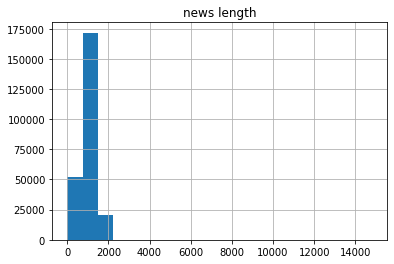

In [ ]:
# EDA
import matplotlib.pyplot as plt

plt.title('news length')
temp = df_train['news'].apply(len)
temp.hist(bins=20)
plt.show()

In [ ]:
print(temp.describe())
print(df_train.loc[df_train['news'].apply(len)<=1,:])

count    243603.000000
mean        996.622505
std         297.576447
min           5.000000
25%         764.000000
50%         925.000000
75%        1171.000000
max       14792.000000
Name: news, dtype: float64
Empty DataFrame
Columns: [id, news, summary]
Index: []


In [ ]:
# 변경사항을 저장하기
df_train.to_csv('/content/drive/MyDrive/Colab_Notebooks/KoBART-summarization/data/train.tsv', sep='\t')
df_valid.to_csv('/content/drive/MyDrive/Colab_Notebooks/KoBART-summarization/data/test.tsv', sep='\t')